# Analysis of Percentage of HS Students in a Foundational Computer Science Class

In [1]:
# Import libraries and csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import r2_score

df = pd.read_csv('StatePoliciesWithDemographic2.csv')
print (df.head())

  StateAbbv   StateName P1_StatePlan P2_Standards P3_Funding P4_Certification  \
0        AK      Alaska           No          Yes         No               No   
1        AL     Alabama  In progress          Yes        Yes              Yes   
2        AR    Arkansas          Yes          Yes        Yes              Yes   
3        AZ     Arizona           No          Yes        Yes              Yes   
4        CA  California          Yes          Yes        Yes              Yes   

  P5_PreserviceIncentives P6_StateCSposition P7_RequireHStoOffer  \
0                      No                 No                  No   
1                     Yes                Yes                 Yes   
2                     Yes                Yes                 Yes   
3                      No        In Progress                  No   
4                      No                 No                  No   

     P8_CountGradReq  ... AP_Black  AP_HLLL  AP_Native  AP_HPI  AP_Asian  \
0  District Decision  ...   

In [2]:
df.dtypes

StateAbbv                   object
StateName                   object
P1_StatePlan                object
P2_Standards                object
P3_Funding                  object
P4_Certification            object
P5_PreserviceIncentives     object
P6_StateCSposition          object
P7_RequireHStoOffer         object
P8_CountGradReq             object
P9_HigherEdAdmission        object
PctReportedFCS             float64
YearOfLast                   int64
NumOfHS                      int64
NumHSWithCS                  int64
PctHSwFCS                  float64
TotalStudents                int64
NumStudentsinHSwCS           int64
PctStudentsHSwCS           float64
Total_Black                  int64
Total_HLLL                   int64
Total_Native                 int64
Total_HPI                    int64
Total_White                  int64
Total_Asian                  int64
Total_TwoPlus                int64
InCSHS_Black                 int64
InCSHS_HLLL                  int64
InCSHS_Native       

## Calculate % of students in FCS (Foundational Computer Science and % in AP CS

In [3]:
df['PctInFCS'] = df['InFCS_Total'] / df['TotalStudents']  # Percentage of students in foundational Computer Science
df['PctInAP'] = df['AP_Total'] / df['TotalStudents'] #
df_sfcs = df.loc[(df['InFCS_Total'].notnull())].copy()
df_sfcs['PctInFCS_ZScore'] = stats.zscore(df_sfcs['PctInFCS'])
print ("Number of states with Students in FCS data: " + str(df_sfcs['StateName'].count()))

Number of states with Students in FCS data: 36


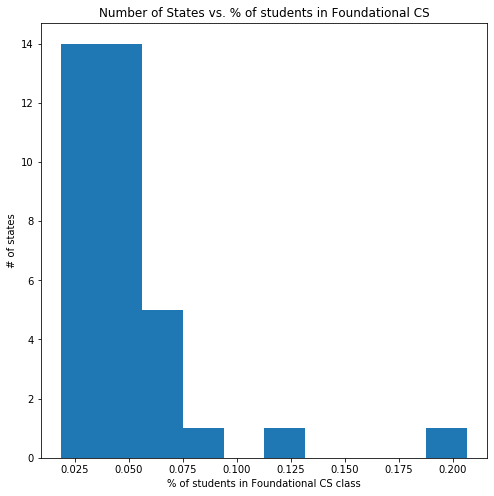

In [4]:
plt.figure(figsize=(8,8))
plt.hist(x=df_sfcs['PctInFCS'], bins=10)
plt.xlabel("% of students in Foundational CS class")
plt.ylabel("# of states")
plt.title('Number of States vs. % of students in Foundational CS')
plt.show()

In [5]:
d = np.polyfit(df_sfcs['PctHSwFCS'],df_sfcs['PctInFCS'],1)
f = np.poly1d(d)
df_sfcs['CalcRegressionA'] = f(df_sfcs['PctHSwFCS'])
r2_sfcs = r2_score(df_sfcs['PctInFCS'],df_sfcs['CalcRegressionA'])
print ("Line of regression: " + str(f));
print ("R2: " + str(r2_sfcs))

Line of regression:  
0.1148 x - 0.01949
R2: 0.3627493182894862


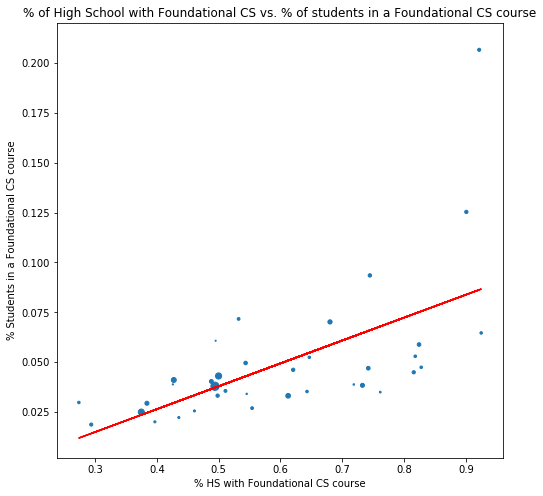

In [6]:
plt.figure(figsize=(8,8))
plt.scatter(x=df_sfcs['PctHSwFCS'], y=df_sfcs['PctInFCS'], s=df_sfcs['TotalStudents']/25000)
plt.plot(df_sfcs['PctHSwFCS'], df_sfcs['CalcRegressionA'], c='r')
plt.xlabel('% HS with Foundational CS course')
plt.ylabel('% Students in a Foundational CS course')
plt.title('% of High School with Foundational CS vs. % of students in a Foundational CS course')
plt.show()

In [7]:
d = np.polyfit(df_sfcs['PctStudentsHSwCS'],df_sfcs['PctInFCS'],1)
f = np.poly1d(d)
df_sfcs['CalcRegressionB'] = f(df_sfcs['PctStudentsHSwCS'])
r2_sfcs = r2_score(df_sfcs['PctInFCS'],df_sfcs['CalcRegressionB'])
print ("Line of regression: " + str(f));
print ("R2: " + str(r2_sfcs))

Line of regression:  
0.158 x - 0.07656
R2: 0.29537924955140493


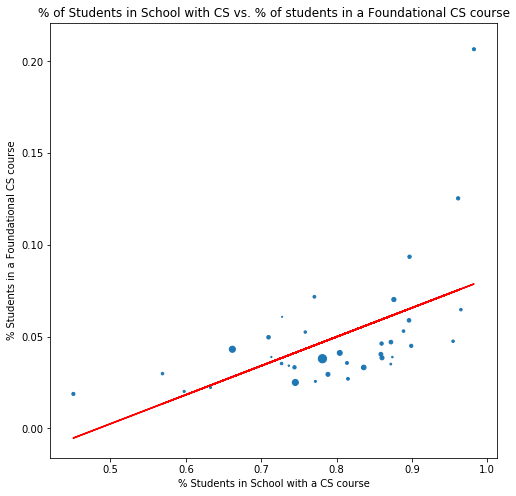

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(x=df_sfcs['PctStudentsHSwCS'], y=df_sfcs['PctInFCS'], s=df_sfcs['TotalStudents']/25000)
plt.plot(df_sfcs['PctStudentsHSwCS'], df_sfcs['CalcRegressionB'], c='r')
plt.xlabel('% Students in School with a CS course')
plt.ylabel('% Students in a Foundational CS course')
plt.title('% of Students in School with CS vs. % of students in a Foundational CS course')
plt.show()

In [9]:
policies = ['P1_StatePlan','P2_Standards', 'P3_Funding', 'P4_Certification', 'P5_PreserviceIncentives', 'P6_StateCSposition', 'P7_RequireHStoOffer',
'P8_CountGradReq', 'P9_HigherEdAdmission']
policiesB = ["B" + p for p in policies]

print (policiesB)


['BP1_StatePlan', 'BP2_Standards', 'BP3_Funding', 'BP4_Certification', 'BP5_PreserviceIncentives', 'BP6_StateCSposition', 'BP7_RequireHStoOffer', 'BP8_CountGradReq', 'BP9_HigherEdAdmission']


In [10]:
def makeBinary(yesno):
    if (yesno.upper() == 'YES'):
        return 1
    else:
        return 0

In [11]:
for i in range(len(policies)):
    df_sfcs[policiesB[i]] = df_sfcs[policies[i]].apply(lambda x:makeBinary(x))

In [12]:
df_sfcs['NumPolicies']=df_sfcs[policiesB].sum(axis=1)

In [13]:
df_sfcs.describe()

,PctReportedFCS,YearOfLast,NumOfHS,NumHSWithCS,PctHSwFCS,TotalStudents,NumStudentsinHSwCS,PctStudentsHSwCS,Total_Black,Total_HLLL,...,BP1_StatePlan,BP2_Standards,BP3_Funding,BP4_Certification,BP5_PreserviceIncentives,BP6_StateCSposition,BP7_RequireHStoOffer,BP8_CountGradReq,BP9_HigherEdAdmission,NumPolicies
count,36.000000,36.000000,36.000000,36.000000,36.000000,3.600000e+01,3.600000e+01,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,0.598611,20.638889,477.083333,261.500000,0.599273,3.167461e+05,2.516436e+05,0.796518,52114.638889,80693.944444,...,0.444444,0.833333,0.666667,0.861111,0.444444,0.611111,0.611111,0.777778,0.500000,5.750000
std,0.178584,0.487136,412.778625,192.188672,0.179382,3.207349e+05,2.463024e+05,0.117583,60408.252066,154919.221413,...,0.503953,0.377964,0.478091,0.350736,0.503953,0.494413,0.494413,0.421637,0.507093,2.430461
min,0.270000,20.000000,55.000000,30.000000,0.273973,3.025400e+04,2.201700e+04,0.450771,289.000000,1519.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.482500,20.000000,249.500000,122.250000,0.481456,1.582752e+05,1.053180e+05,0.734436,8819.250000,18122.500000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000
50%,0.550000,21.000000,359.000000,239.000000,0.549853,2.429565e+05,1.906145e+05,0.809066,25713.500000,33167.500000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.500000,6.000000
75%,0.740000,21.000000,512.250000,322.250000,0.742813,3.501768e+05,3.041792e+05,0.874597,76211.000000,66479.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.250000
max,0.920000,21.000000,2066.000000,1021.000000,0.924837,1.714001e+06,1.339124e+06,0.982347,211916.000000,889858.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


In [14]:
d = np.polyfit(df_sfcs['NumPolicies'],df_sfcs['PctInFCS'],1)
f = np.poly1d(d)
df_sfcs['CalcRegressionC'] = f(df_sfcs['NumPolicies'])
r2_policies = r2_score(df_sfcs['PctInFCS'],df_sfcs['CalcRegressionC'])
print ("Line of regression: " + str(f));
print ("R2: " + str(r2_policies))

Line of regression:  
0.005008 x + 0.02051
R2: 0.12674725831692746


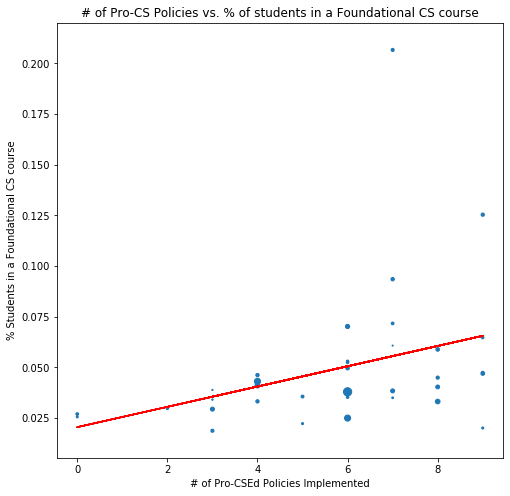

In [15]:

plt.figure(figsize=(8,8))
plt.scatter(x=df_sfcs['NumPolicies'], y=df_sfcs['PctInFCS'], s=df_sfcs['TotalStudents']/25000)
plt.plot(df_sfcs['NumPolicies'], df_sfcs['CalcRegressionC'], c='r')
plt.xlabel('# of Pro-CSEd Policies Implemented')
plt.ylabel('% Students in a Foundational CS course')
plt.title('# of Pro-CS Policies vs. % of students in a Foundational CS course')
plt.show()


In [16]:
polWresults = policiesB + ['NumPolicies','PctInFCS']
corrWresults =df_sfcs[polWresults].corr()

In [17]:
print (corrWresults)

                          BP1_StatePlan  BP2_Standards  BP3_Funding  \
BP1_StatePlan                  1.000000       0.250000     0.158114   
BP2_Standards                  0.250000       1.000000     0.316228   
BP3_Funding                    0.158114       0.316228     1.000000   
BP4_Certification              0.197566       0.251447     0.397573   
BP5_PreserviceIncentives       0.325000       0.100000     0.395285   
BP6_StateCSposition            0.484165       0.407718     0.282038   
BP7_RequireHStoOffer           0.254824       0.101929     0.161165   
BP8_CountGradReq               0.343628       0.119523     0.188982   
BP9_HigherEdAdmission          0.111803      -0.149071     0.235702   
NumPolicies                    0.606494       0.419881     0.590124   
PctInFCS                       0.169975       0.248579     0.185490   

                          BP4_Certification  BP5_PreserviceIncentives  \
BP1_StatePlan                      0.197566                  0.325000   
B

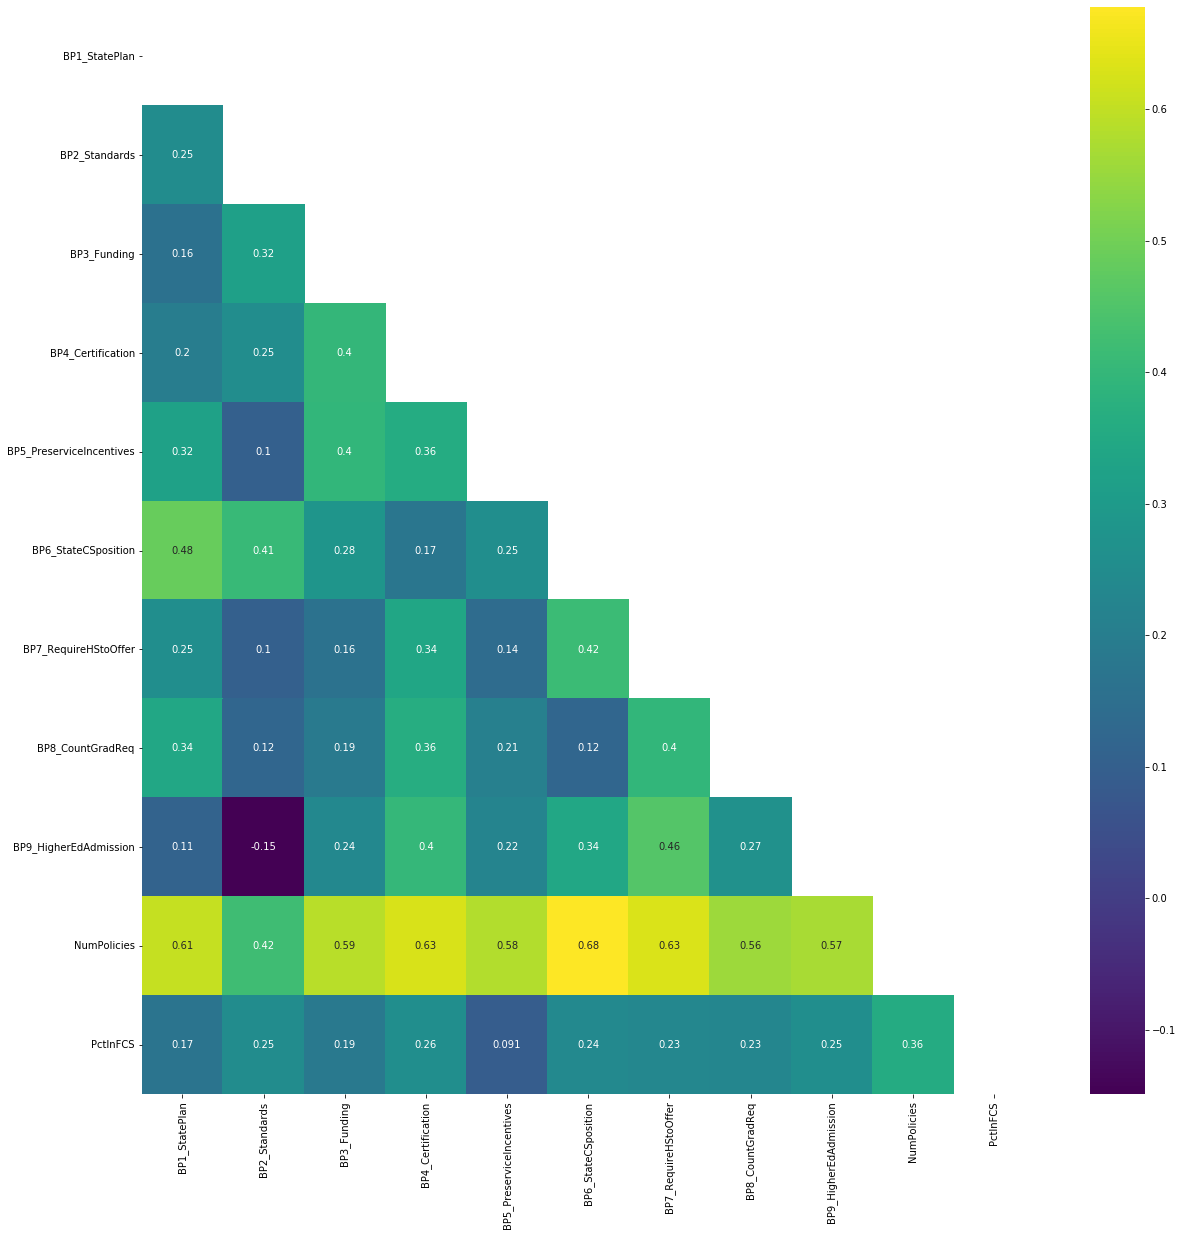

In [18]:
mask = np.zeros_like(corrWresults)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(corrWresults, mask=mask,  annot=True, cmap="viridis")


In [19]:
# Find total aggregations
aggdf = df_sfcs.agg({'StateAbbv':'count','PctInFCS':'mean', 'TotalStudents':'sum', 'InFCS_Total': 'sum' })
PctInFCS_StAvg = aggdf['PctInFCS']
PctInFCS_StDev = np.std(df_sfcs['PctInFCS'])
PctInFCS_WtAvg = aggdf['InFCS_Total']/aggdf['TotalStudents']
print("% of students in FCS - State Average:" + str(PctInFCS_StAvg))
print("% of HS with FCS - Standard Deviation: " + str(PctInFCS_StDev))
print("% of students in FCS - National Average:" + str(PctInFCS_WtAvg))


% of students in FCS - State Average:0.049300464475474426
% of HS with FCS - Standard Deviation: 0.03370824074371974
% of students in FCS - National Average:0.047091352010171485


In [20]:
def agg_policy(policy_binary):
    aggdf = df_sfcs.groupby(policy_binary).agg({'StateAbbv':'count','PctInFCS':'mean', 'TotalStudents':'sum', 'InFCS_Total': 'sum' })
    row0 =  aggdf.loc[0]
    row1 =  aggdf.loc[1]
    ret_row = {'Policy': policy_binary[1:]}
    ret_row.update({'Cnt0':row0['StateAbbv'],'Cnt1':row1['StateAbbv'],'StAvg0':row0['PctInFCS'],'StAvg1':row1['PctInFCS']})
    ret_row.update({'WStAvg0': row0['InFCS_Total'] / row0['TotalStudents'], 'WStAvg1': row1['InFCS_Total'] / row1['TotalStudents'] })
    return ret_row
    
    

In [21]:
policy_agg = pd.DataFrame(columns=['Policy','Cnt0','Cnt1','StAvg0','StAvg1','WStAvg0','WStAvg1'])
policy_agg = pd.DataFrame()
for polB in policiesB:
    policy_agg = policy_agg.append(agg_policy(polB),ignore_index=True)
policy_agg.set_index('Policy')
policy_agg['PctImplemented'] = policy_agg['Cnt1']/(policy_agg['Cnt1'] + policy_agg['Cnt0'])
policy_agg['StAvgDiff'] = policy_agg['StAvg1'] - policy_agg['StAvg0']
policy_agg['WStAvgDiff'] = policy_agg['WStAvg1'] - policy_agg['WStAvg0']
policy_agg['StAvgDiffPct'] = policy_agg['StAvgDiff']/PctInFCS_StAvg
policy_agg['WStAvgDiffPct'] = policy_agg['WStAvgDiff']/PctInFCS_WtAvg

print (policy_agg)
                                                   

   Cnt0  Cnt1                   Policy    StAvg0    StAvg1   WStAvg0  \
0  20.0  16.0             P1_StatePlan  0.044176  0.055706  0.041477   
1   6.0  30.0             P2_Standards  0.030564  0.053048  0.035344   
2  12.0  24.0               P3_Funding  0.040458  0.053722  0.040065   
3   5.0  31.0         P4_Certification  0.027731  0.052779  0.027179   
4  20.0  16.0  P5_PreserviceIncentives  0.046567  0.052717  0.045846   
5  14.0  22.0       P6_StateCSposition  0.039095  0.055795  0.040765   
6  14.0  22.0      P7_RequireHStoOffer  0.039399  0.055601  0.042336   
7   8.0  28.0          P8_CountGradReq  0.034831  0.053435  0.037205   
8  18.0  18.0     P9_HigherEdAdmission  0.040714  0.057887  0.041792   

    WStAvg1  PctImplemented  StAvgDiff  WStAvgDiff  StAvgDiffPct  \
0  0.059183        0.444444   0.011531    0.017706      0.233883   
1  0.052127        0.833333   0.022484    0.016783      0.456054   
2  0.048719        0.666667   0.013264    0.008654      0.269038   
3  0.04

<Figure size 3600x2880 with 0 Axes>

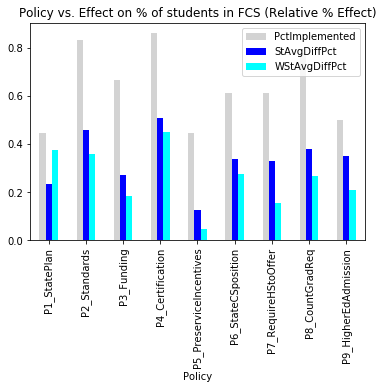

In [22]:
plt.figure(figsize=(50,40))
policy_agg_chart = policy_agg[['Policy','PctImplemented','StAvgDiffPct','WStAvgDiffPct']]
policy_agg_chart.plot(kind='bar', x='Policy', color=['lightgrey', 'blue', 'cyan'])
plt.title("Policy vs. Effect on % of students in FCS (Relative % Effect)")
plt.show()

<Figure size 3600x2880 with 0 Axes>

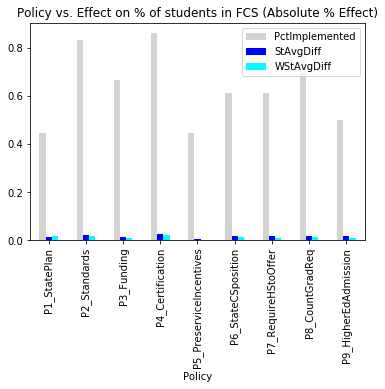

In [23]:
plt.figure(figsize=(50,40))
policy_agg_chart = policy_agg[['Policy','PctImplemented','StAvgDiff','WStAvgDiff']]
policy_agg_chart.plot(kind='bar', x='Policy', color=['lightgrey', 'blue', 'cyan'])
plt.title("Policy vs. Effect on % of students in FCS (Absolute % Effect)")
plt.show()

In [24]:
print (df_sfcs[['StateName','NumPolicies','TotalStudents','PctInFCS', 'PctInFCS_ZScore']].sort_values('PctInFCS',ascending=False))

         StateName  NumPolicies  TotalStudents  PctInFCS  PctInFCS_ZScore
40  South Carolina            7         241394  0.206658         4.668221
20        Maryland            9         270650  0.125361         2.256442
44            Utah            7         287198  0.093517         1.311753
36        Oklahoma            7         197146  0.071693         0.664306
31      New Jersey            6         449520  0.070193         0.619795
2         Arkansas            9         159278  0.064667         0.455863
50         Wyoming            7          30254  0.060752         0.339734
19   Massachusetts            8         327368  0.058854         0.283426
6      Connecticut            6         169150  0.052971         0.108884
25     Mississippi            6         155429  0.052442         0.093196
42       Tennessee            6         312860  0.049604         0.008995
33          Nevada            9         161249  0.047448        -0.054945
15         Indiana            9       